The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

# Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Loading the dataset

In [2]:
df =pd.read_csv('F:\ML Algorithms\Bigmart sales prediction data\BigmartTraindata.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing the dataset

In [6]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [10]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [11]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [12]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [13]:
df['Item_Weight'].isnull().sum()

0

In [14]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [16]:

df['Outlet_Size'].isnull().sum()

0

In [17]:
sum(df['Item_Visibility']==0)

526

In [18]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [19]:
sum(df['Item_Visibility']==0)

0

In [20]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Creation of New Attributes 

In [21]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [22]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [23]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [24]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [25]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Exploratory Data Analysis

<Axes: xlabel='Item_Weight', ylabel='Density'>

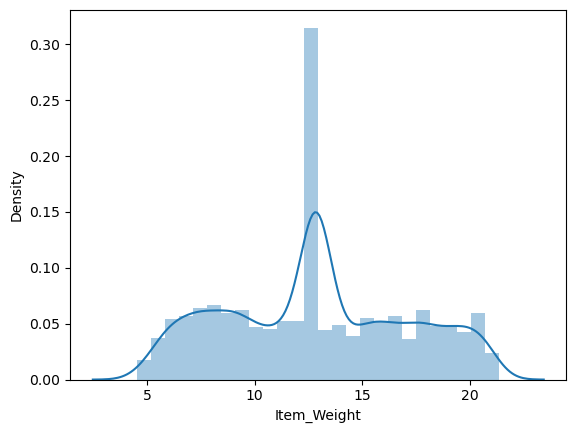

In [27]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

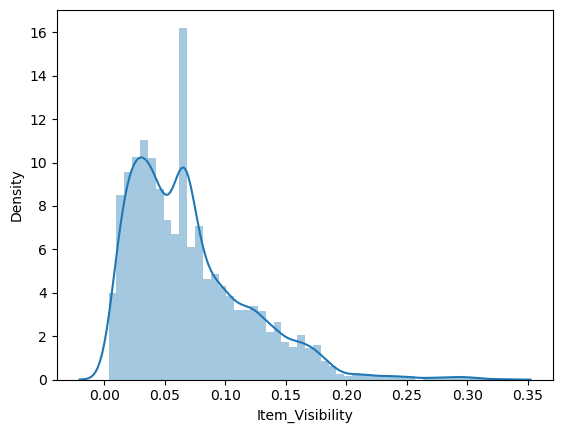

In [28]:
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

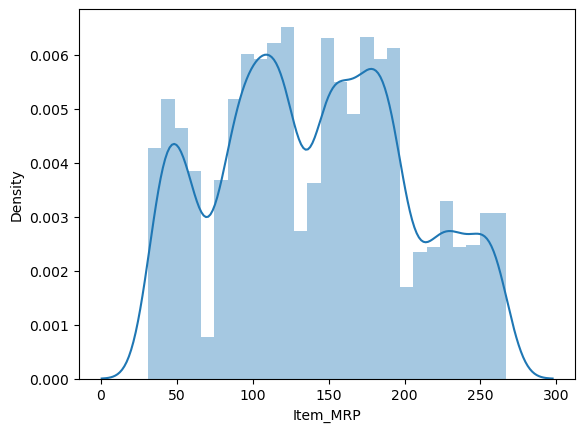

In [29]:
sns.distplot(df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

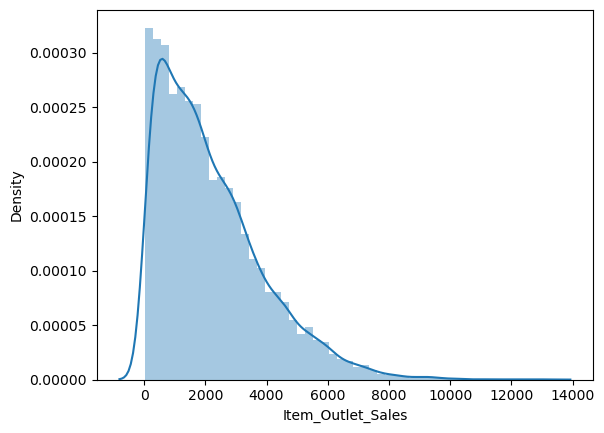

In [30]:
sns.distplot(df['Item_Outlet_Sales'])

In [31]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

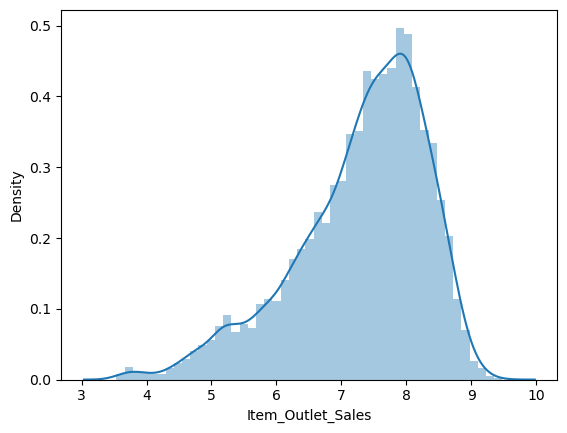

In [32]:
sns.distplot(df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

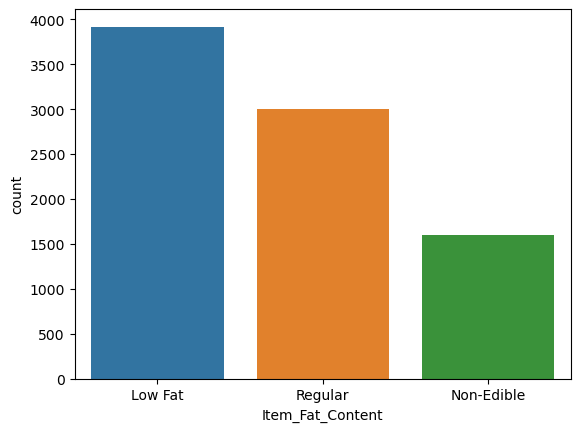

In [33]:
sns.countplot(x='Item_Fat_Content',data = df)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

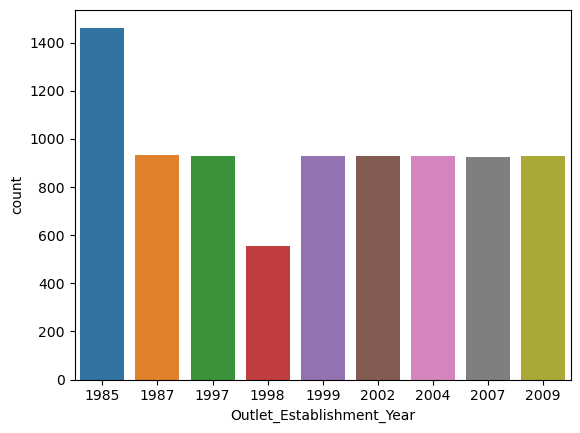

In [34]:
sns.countplot(x='Outlet_Establishment_Year',data= df)

<Axes: xlabel='Outlet_Size', ylabel='count'>

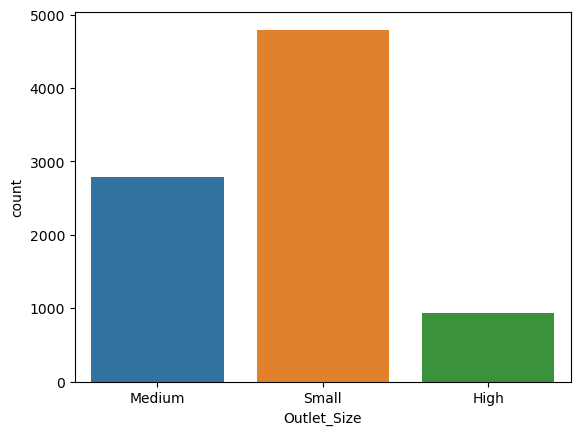

In [35]:
sns.countplot(x='Outlet_Size',data=df)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

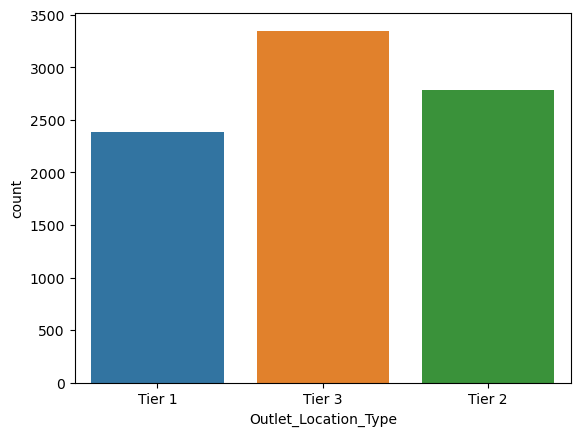

In [36]:
sns.countplot(x='Outlet_Location_Type',data=df)

<Axes: xlabel='Outlet_Type', ylabel='count'>

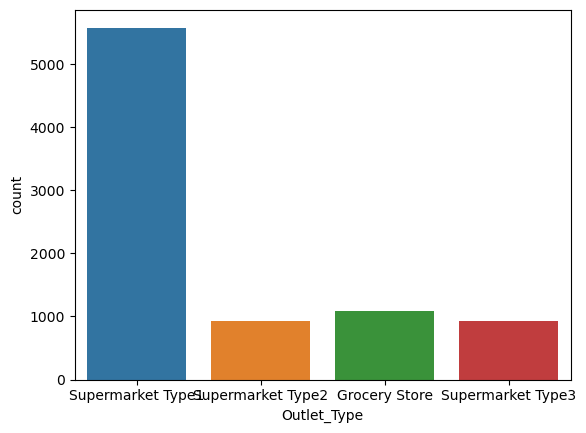

In [37]:
sns.countplot(x='Outlet_Type',data=df)

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


# Label Encoding

In [39]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [40]:
top10=[x for x in df["Item_Type"].value_counts().sort_values(ascending=False).head(10).index]
top10

['Fruits and Vegetables',
 'Snack Foods',
 'Household',
 'Frozen Foods',
 'Dairy',
 'Canned',
 'Baking Goods',
 'Health and Hygiene',
 'Soft Drinks',
 'Meat']

In [41]:
for label in top10:
  df[label]=np.where(df["Item_Type"]==label,1,0)

encoder=df[["Item_Type"]+top10].head(16)

In [42]:
df=pd.merge(df,encoder)

In [43]:
df.drop("Item_Type",axis=1,inplace=True)

# Onehot Encoding

In [44]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],drop_first= True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Fruits and Vegetables,Snack Foods,...,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,8.225808,14,0,0,...,0,1,0,0,0,1,0,0,1,0
1,FDA15,9.30,0.016047,249.8092,OUT049,1999,8.225808,14,0,0,...,0,1,0,0,0,1,0,0,1,0
2,FDA03,18.50,0.045464,144.1102,OUT046,1997,7.690813,16,0,0,...,1,0,1,0,0,1,0,0,1,0
3,FDA03,18.50,0.045464,144.1102,OUT046,1997,7.690813,16,0,0,...,1,0,1,0,0,1,0,0,1,0
4,FDU02,13.35,0.102492,230.5352,OUT035,2004,7.919146,9,0,0,...,0,0,1,1,0,1,0,0,1,0


In [45]:
df = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [46]:
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,...,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.30,0.016047,249.8092,8.225808,14,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,9.30,0.016047,249.8092,8.225808,14,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,18.50,0.045464,144.1102,7.690813,16,0,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
3,18.50,0.045464,144.1102,7.690813,16,0,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
4,13.35,0.102492,230.5352,7.919146,9,0,0,0,0,1,...,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14137,16.50,0.066250,183.3292,7.604756,16,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
14138,13.85,0.056406,231.4300,8.016447,14,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
14139,8.06,0.021373,231.7326,8.578241,9,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
14140,18.60,0.152367,98.5358,7.176228,11,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0


In [47]:
X = df.drop(columns=['Item_Outlet_Sales'])
Y = df['Item_Outlet_Sales']

# Model Training

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2 ,random_state=100)

In [50]:
print("X_train shape :",X_train.shape)
print( "X_test shape :",X_test.shape)

X_train shape : (11313, 25)
X_test shape : (2829, 25)


In [51]:
import statsmodels.api as sm

In [52]:
X = sm.add_constant(df)

In [53]:
stats_model=sm.OLS(Y_train,X_train)

In [54]:
LR_stats_model=stats_model.fit()

In [55]:
LR_stats_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS               Adj. R-squared (uncentered): 0.995     
Dependent Variable:     Item_Outlet_Sales AIC:                         18528.4663
Date:                   2023-07-04 00:27  BIC:                         18682.4742
No. Observations:       11313             Log-Likelihood:              -9243.2   
Df Model:               21                F-statistic:                 9.745e+04 
Df Residuals:           11292             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.995             Scale:                       0.30061   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Item_Weight                       0.0016   0.0012   1.2858 0.1985 -0.0008  0.0040
Item_Visibility                   0.2494   0.1115   2.2369 0.0253  0.0309  0.4679
Item_MRP                          0.0082   0.0001  98.1463 0.0000  0.0081  0.0084
Outlet_Years                      0.0705   0.0017  42.4023 0.0000  0.0672  0.0737
Fruits and Vegetables             0.4258   0.0578   7.3650 0.0000  0.3125  0.5392
Snack Foods                       0.4378   0.0581   7.5391 0.0000  0.3239  0.5516
Household                         0.1766   0.0240   7.3710 0.0000  0.1297  0.2236
Frozen Foods                      0.3977   0.0589   6.7472 0.0000  0.2822  0.5133
Dairy                             0.3884   0.0598   6.4987 0.0000  0.2713  0.5056
Canned                           -0.0000   0.0000  -2.8823 0.0040 -0.0000 -0.0000
Baking Goods                      0.4416   0.0620   7.1280 0.0000  0.3202  0.5630
Health and Hygiene               -0.0000   0.0000  -1.1202 0.2627 -0.0000  0.0000
Soft Drinks                       0.5362   0.0747   7.1772 0.0000  0.3897  0.6826
Meat                              0.4668   0.0645   7.2428 0.0000  0.3405  0.5932
Item_Fat_Content_Non-Edible       0.1766   0.0240   7.3710 0.0000  0.1297  0.2236
Item_Fat_Content_Regular          0.0207   0.0109   1.8979 0.0577 -0.0007  0.0421
Outlet_Size_Medium                1.9355   0.0412  46.9788 0.0000  1.8547  2.0162
Outlet_Size_Small                 1.7564   0.0367  47.8479 0.0000  1.6845  1.8284
Outlet_Location_Type_Tier 2       0.5089   0.0230  22.1164 0.0000  0.4638  0.5540
Outlet_Location_Type_Tier 3       1.0229   0.0267  38.2435 0.0000  0.9705  1.0754
Outlet_Type_Supermarket Type1     2.8818   0.0245 117.4393 0.0000  2.8337  2.9299
Outlet_Type_Supermarket Type2     2.3609   0.0377  62.6333 0.0000  2.2870  2.4348
Outlet_Type_Supermarket Type3     1.3745   0.0413  33.2535 0.0000  1.2935  1.4556
New_Item_Type_Food                0.1163   0.0416   2.7972 0.0052  0.0348  0.1977
New_Item_Type_Non-Consumable      0.1766   0.0240   7.3710 0.0000  0.1297  0.2236
---------------------------------------------------------------------------------
Omnibus:             1000.222       Durbin-Watson:          2.001                
Prob(Omnibus):       0.000          Jarque-Bera (JB):       1387.527             
Skew:                -0.725         Prob(JB):               0.000                
Kurtosis:            3.918          Condition No.:          482643363939544727552
=================================================================================
* The condition number is large (5e+20). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
LR = LinearRegression()

In [58]:
LR.fit(X_train,Y_train)

LinearRegression()

In [59]:
LR_pred = LR.predict(X_test)

In [60]:
print("r2_score for LR on test data:",r2_score(Y_test,LR_pred))
print("MSE for LR on test data:",mean_squared_error(Y_test,LR_pred))

r2_score for LR on test data: 0.7294210710688573
MSE for LR on test data: 0.29405293001080623


In [61]:
LR_pred = LR.predict(X_train)

In [62]:
print("r2_score for LR on train data:",r2_score(Y_train,LR_pred))
print("MSE for LR on test data:",mean_squared_error(Y_train,LR_pred))

r2_score for LR on train data: 0.7182266292673192
MSE for LR on test data: 0.2866696896403865


In [63]:
  from sklearn.ensemble import RandomForestRegressor

In [64]:
RF = RandomForestRegressor()

In [65]:
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [66]:
RF_pred = RF.predict(X_test)

In [67]:
print("r2_score for RF on test data:",r2_score(Y_test,RF_pred))
print("MSE for RF on test data:",mean_squared_error(Y_test,RF_pred))

r2_score for RF on test data: 0.9204921935781232
MSE for RF on test data: 0.08640548445305776


In [68]:
 from sklearn.tree import DecisionTreeRegressor

In [69]:
DT = DecisionTreeRegressor()

In [70]:
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [71]:
DT_pred = DT.predict(X_test) 

In [72]:
print('r2 score fot DT on test data: ',r2_score(Y_test,DT_pred))
print('MSE fot DT on test data: ',mean_squared_error(Y_test,DT_pred))

r2 score fot DT on test data:  0.8783820714524528
MSE fot DT on test data:  0.13216885872274223


In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
KNN = KNeighborsRegressor()

In [75]:
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [76]:
KNN_pred = KNN.predict(X_test)

In [77]:
print('r2 score fot KNN on test data: ',r2_score(Y_test,KNN_pred))
print('MSE fot KNN on test data: ',mean_squared_error(Y_test,KNN_pred))

r2 score fot KNN on test data:  0.7090268838935598
MSE fot KNN on test data:  0.31621640932449346


In [78]:
from sklearn.svm import SVR

In [79]:
SVR = SVR()

In [80]:
SVR.fit(X_train,Y_train)

SVR()

In [81]:
SVR_pred = SVR.predict(X_test)

In [82]:
print('r2 score fot SVR on test data: ',r2_score(Y_test,SVR_pred))
print('MSE fot SVR on test data: ',mean_squared_error(Y_test,SVR_pred))

r2 score fot SVR on test data:  0.2809432241181583
MSE fot SVR on test data:  0.7814383500867023


## Feature selection using Pearson Correlation technique

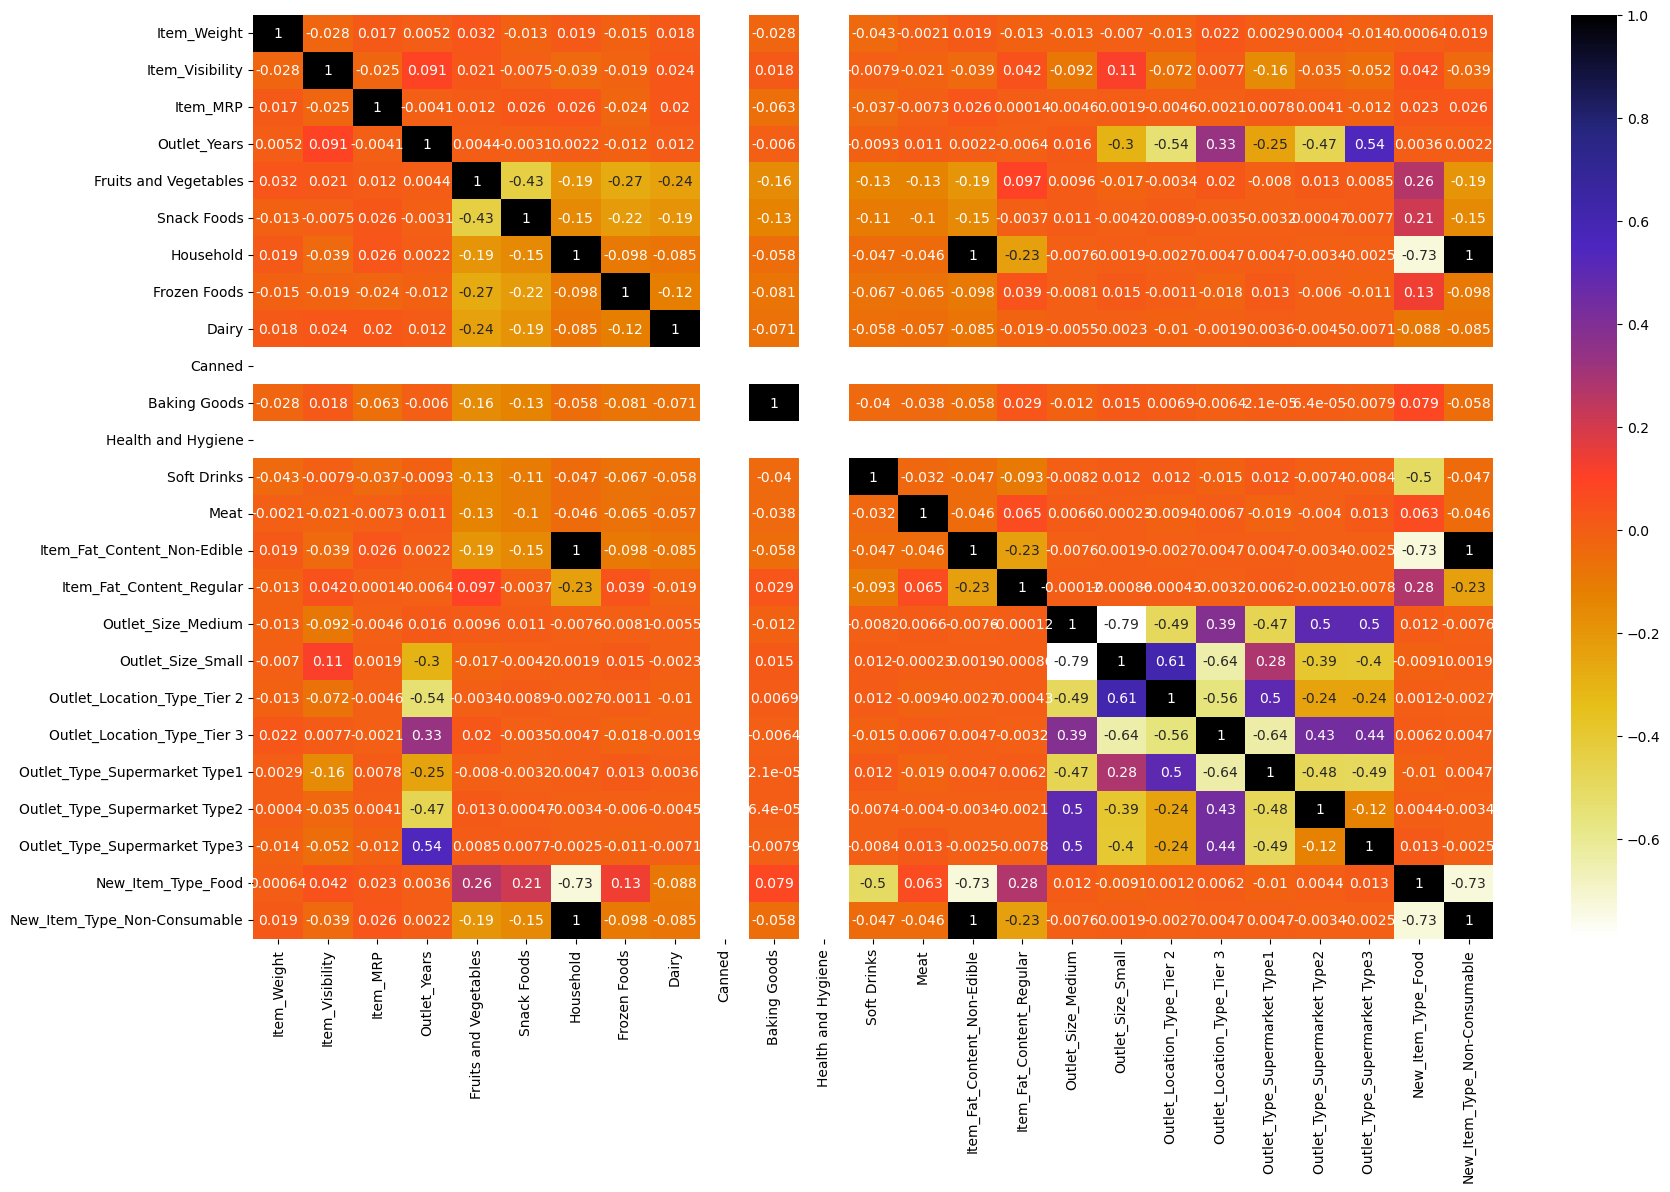

In [83]:
plt.figure(figsize=(20,12))
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [84]:
def correlation(df,threshold):
  col_corr = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if abs(corr_matrix.iloc[i,j]) > threshold:
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
  return col_corr

In [85]:
corr_features = correlation(X_train,0.4)
len(set(corr_features))

10

In [86]:
corr_features

{'Item_Fat_Content_Non-Edible',
 'New_Item_Type_Food',
 'New_Item_Type_Non-Consumable',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Size_Small',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3',
 'Snack Foods'}

In [87]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Years', 'Fruits and Vegetables', 'Snack Foods', 'Household',
       'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene',
       'Soft Drinks', 'Meat', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'New_Item_Type_Food',
       'New_Item_Type_Non-Consumable'],
      dtype='object')

## Out of 26 only 15 features are important

# Building ML model using Important Features

In [88]:
x = df[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Years', 'Fruits and Vegetables', 'Household',
       'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene',
       'Soft Drinks', 'Meat','Item_Fat_Content_Regular', 'Outlet_Size_Medium']]
y = df['Item_Outlet_Sales']

In [89]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x,y,test_size=0.2,shuffle = True,random_state=100)

### Linear REgression model after feature selection

In [90]:
LRF = LinearRegression()

In [91]:
LRF.fit(X_train1,Y_train1)

LinearRegression()

In [92]:
LRF_pred = LRF.predict(X_test1)

In [93]:
print('r2 score for LR on test data after feature selection: ',r2_score(Y_test1,LRF_pred))
print('MSE fot LR on test data after feature selection: ',mean_squared_error(Y_test1,LRF_pred))

r2 score for LR on test data after feature selection:  0.35692684001050967
MSE fot LR on test data after feature selection:  0.6988627963500419


### Random Forest model after feature selection

In [94]:
RFF = RandomForestRegressor()

In [95]:
RFF.fit(X_train1,Y_train1)

RandomForestRegressor()

In [96]:
RFF_pred = RFF.predict(X_test1)

In [97]:
print('r2 score for RF on test data after feature selection: ',r2_score(Y_test1,RFF_pred))
print('MSE fot RF on test data after feature selection: ',mean_squared_error(Y_test1,RFF_pred))

r2 score for RF on test data after feature selection:  0.9163388227179176
MSE fot RF on test data after feature selection:  0.09091917986788353


### Decision Tree model after feature selection

In [98]:
DTF = DecisionTreeRegressor()

In [99]:
DTF.fit(X_train1,Y_train1)

DecisionTreeRegressor()

In [100]:
DTF_pred = DTF.predict(X_test1)

In [101]:
print('r2 score for DT on test data after feature selection: ',r2_score(Y_test1,DTF_pred))
print('MSE fot DT on test data after feature selection: ',mean_squared_error(Y_test1,DTF_pred))

r2 score for DT on test data after feature selection:  0.8676297766710617
MSE fot DT on test data after feature selection:  0.14385396590125638


### KNN model after feature selection

In [102]:
KNNF = KNeighborsRegressor()

In [103]:
KNNF.fit(X_train1,Y_train1)

KNeighborsRegressor()

In [104]:
KNNF_pred = KNNF.predict(X_test1)

In [105]:
print('r2 score for KNN on test data after feature selection: ',r2_score(Y_test1,KNNF_pred))
print('MSE for KNN on test data after feature selection: ',mean_squared_error(Y_test1,KNNF_pred))

r2 score for KNN on test data after feature selection:  0.5835405685666006
MSE for KNN on test data after feature selection:  0.4525892556651728


### SVR model after feature selection

In [106]:
from sklearn.svm import SVR

In [107]:
SVRF = SVR()

In [108]:
SVRF.fit(X_train1,Y_train1)

SVR()

In [109]:
SVRF_pred = SVRF.predict(X_test1)

In [110]:
print('r2 score for SVR on test data after feature selection: ',r2_score(Y_test1,SVRF_pred))
print('MSE for SVR on test data after feature selection: ',mean_squared_error(Y_test1,SVRF_pred))

r2 score for SVR on test data after feature selection:  0.23801017394455404
MSE for SVR on test data after feature selection:  0.8280960453023632


# HYPERPARAMETER TUNING AND IMPROVING ACCURACY

## Hyperparameter tuning for Random forest

In [128]:
parameters_for_Random_Forest_regression = {
    "n_estimators" : [85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100],
    "max_depth" : [8,9,10,11,12,14,16,18,19,20,21,22,23,24,25,26,27,28,29,30],
    "min_samples_split" :[1,2,3,4,5],
    "min_samples_leaf":[1,2,3]
    }

In [129]:
regression_for_rfr=RandomizedSearchCV(RF,parameters_for_Random_Forest_regression,cv=10)

In [130]:
regression_for_rfr.fit(X,Y)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [8, 9, 10, 11, 12, 14, 16,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 29,
                                                      30],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [85, 86, 87, 88, 89, 90,
                                                         91, 92, 93, 94, 95, 96,
                                                         97, 98, 99, 100]})

In [131]:
print(regression_for_rfr.best_params_)

{'n_estimators': 97, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 24}


In [138]:
rfr_model_with_pm1=RandomForestRegressor(n_estimators=97,
 min_samples_split=4,
 min_samples_leaf=2,
 max_depth=24)

In [139]:
rfr_model_with_pm1.fit(X_train,Y_train)

RandomForestRegressor(max_depth=24, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=97)

In [140]:
rfr_model_with_pm1_pred=rfr_model_with_pm1.predict(X_test)

In [141]:
print('r2 score for RF on test data after hyperparameter tuning: ',r2_score(Y_test,rfr_model_with_pm1_pred))
print('MSE fot RF on test data after hyperparameter tuning: ',mean_squared_error(Y_test,rfr_model_with_pm1_pred))

r2 score for RF on test data after hyperparameter tuning:  0.9075466188406373
MSE fot RF on test data after hyperparameter tuning:  0.10047414899123526


## Hyperparameter tuning for Decision Tree

In [142]:
parameters_for_decision_tree_regression={
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    "min_samples_split": [1,2,3,4,5,6,7,8,9,10],
    "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10]
}

In [143]:
regression_for_dtr = RandomizedSearchCV(DT,parameters_for_decision_tree_regression,cv=10)

In [144]:
regression_for_dtr.fit(X,Y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10]})

In [145]:
print(regression_for_dtr.best_params_)

{'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 14}


In [146]:
dtr_model_with_pm1=DecisionTreeRegressor(min_samples_split=8,
 min_samples_leaf=2,
 max_depth=14)

In [147]:
dtr_model_with_pm1.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=2, min_samples_split=8)

In [148]:
dtr_model_with_pm1_pred=dtr_model_with_pm1.predict(X_test)

In [149]:
print('r2 score for DT on test data after hyperparameter tuning: ',r2_score(Y_test,dtr_model_with_pm1_pred))
print('MSE fot DT on test data after hyperparameter tuning: ',mean_squared_error(Y_test,dtr_model_with_pm1_pred))

r2 score for DT on test data after hyperparameter tuning:  0.8279717485346958
MSE fot DT on test data after hyperparameter tuning:  0.18695251543730337
